# Cats vs dogs classification based on limited data  

##### In this study, we aim at classifying two classes of images of cats and dogs respectively by using limited data. There are 1000 images of each class and there are 400 images for validation. In total, we have 2000 training data and 800 validating data. 

##### It is commonly believed that deep learning works well with large amount of training data especially in image classification. It is not completely wrong. In this study, we will train the deep learning classifier with limited data and try to improve the performance by using two techniques, namely data augmentation and pre-trained network.  


## Deep learning with original data 

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'new_data/train'
validation_data_dir = 'new_data/validate'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 30
batch_size = 16

Using TensorFlow backend.


### Original data 

In this section, we build and train a classifier by using original data. The model we used is based on deep convolutional network or **CNN**.  

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=[img_width, img_height, 3]))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [27]:
# only rescaling for training data
train_datagen = ImageDataGenerator(rescale=1. / 255)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Now it is time to fit the model. 

In [28]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
125/125 [==============================] - 458s 4s/step - loss: 1.1213 - accuracy: 0.5185 - val_loss: 0.6874 - val_accuracy: 0.5475
Epoch 2/30
125/125 [==============================] - 443s 4s/step - loss: 0.6961 - accuracy: 0.5585 - val_loss: 0.6676 - val_accuracy: 0.5975
Epoch 3/30
125/125 [==============================] - 448s 4s/step - loss: 0.6549 - accuracy: 0.6335 - val_loss: 0.6239 - val_accuracy: 0.6812
Epoch 4/30
125/125 [==============================] - 454s 4s/step - loss: 0.6488 - accuracy: 0.6650 - val_loss: 0.6260 - val_accuracy: 0.6438
Epoch 5/30
125/125 [==============================] - 445s 4s/step - loss: 0.6123 - accuracy: 0.6755 - val_loss: 0.7311 - val_accuracy: 0.5825
Epoch 6/30
125/125 [==============================] - 446s 4s/step - loss: 0.5867 - accuracy: 0.7050 - val_loss: 0.6698 - val_accuracy: 0.6600
Epoch 7/30
125/125 [==============================] - 443s 4s/step - loss: 0.5376 - accuracy: 0.7490 - val_loss: 0.6530 - val_accuracy: 0.6550

Let plot the training error and validation error. 

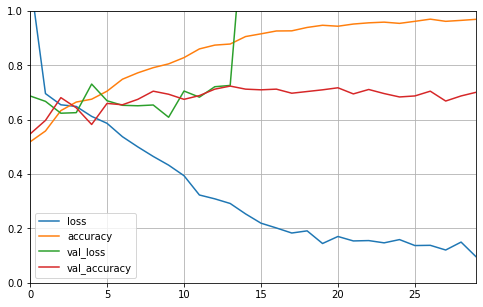

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### We can see in the image above that there exist the overfitting sign. 

## Data Augmentation

##### **Data augmentation** is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Some commonly used data augmentation techniques are cropping, padding, and horizontal flipping.

In this section, we apply data augmentation on the original data and train the model based on the agumented data. 

In [22]:
model_aug = keras.models.Sequential()
model_aug.add(keras.layers.Conv2D(32, (3, 3), input_shape=[img_width, img_height, 3]))
model_aug.add(keras.layers.Activation('relu'))
model_aug.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_aug.add(keras.layers.Conv2D(64, (3, 3)))
model_aug.add(keras.layers.Dense(256, activation='relu'))
model_aug.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_aug.add(keras.layers.Flatten())
model_aug.add(keras.layers.Dense(64, activation='relu'))
model_aug.add(keras.layers.Dropout(0.5))
model_aug.add(keras.layers.Dense(1))
model_aug.add(keras.layers.Activation('sigmoid'))

model_aug.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [23]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling for testing data
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [24]:
history = model_aug.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
125/125 [==============================] - 161s 1s/step - loss: 1.5667 - accuracy: 0.5310 - val_loss: 0.7129 - val_accuracy: 0.5175
Epoch 2/30
125/125 [==============================] - 165s 1s/step - loss: 0.6927 - accuracy: 0.6095 - val_loss: 0.6338 - val_accuracy: 0.6712
Epoch 3/30
125/125 [==============================] - 166s 1s/step - loss: 0.6980 - accuracy: 0.6530 - val_loss: 0.5932 - val_accuracy: 0.6913
Epoch 4/30
125/125 [==============================] - 158s 1s/step - loss: 0.6474 - accuracy: 0.6575 - val_loss: 0.5694 - val_accuracy: 0.7113
Epoch 5/30
125/125 [==============================] - 168s 1s/step - loss: 0.6243 - accuracy: 0.6725 - val_loss: 0.5911 - val_accuracy: 0.6975
Epoch 6/30
125/125 [==============================] - 176s 1s/step - loss: 0.6186 - accuracy: 0.6835 - val_loss: 0.5860 - val_accuracy: 0.6988
Epoch 7/30
125/125 [==============================] - 191s 2s/step - loss: 0.6041 - accuracy: 0.6995 - val_loss: 0.5991 - val_accuracy: 0.6737

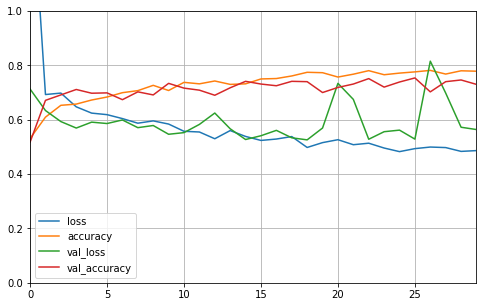

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Using Pre-Trained Network VGG16

##### **VGG16** is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

In this classifier, we adopt the pre-trained network VGG16 to our model. 

In [3]:
# We don't need to use augmentation technique here
datagen_vgg = ImageDataGenerator(rescale=1. / 255)

# Build the VGG16 network
model_vgg = tf.keras.applications.VGG16(include_top=False, weights='imagenet')

In [4]:
generator = datagen_vgg.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

train_data = model_vgg.predict_generator(generator, nb_train_samples // batch_size)

generator = datagen_vgg.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

validation_data = model_vgg.predict_generator(generator, nb_validation_samples // batch_size)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [8]:
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

# Now we embed the model VGG16 with our as follows:
model_vgg = keras.models.Sequential()
model_vgg.add(keras.layers.Flatten(input_shape=train_data.shape[1:]))
model_vgg.add(keras.layers.Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model_vgg.add(keras.layers.Dropout(0.8))
model_vgg.add(keras.layers.Dense(1, activation='sigmoid'))

model_vgg.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model_vgg.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))

Train on 2000 samples, validate on 800 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/sample - loss: 0.9311 - accuracy: 0.7035 - val_loss: 0.4058 - val_accuracy: 0.8612
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.6527 - accuracy: 0.7700 - val_loss: 0.3640 - val_accuracy: 0.8813
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5672 - accuracy: 0.8140 - val_loss: 0.3886 - val_accuracy: 0.8662
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5682 - accuracy: 0.8140 - val_loss: 0.3433 - val_accuracy: 0.9100
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5303 - accuracy: 0.8310 - val_loss: 0.3434 - val_accuracy: 0.8850
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.5247 - accuracy: 0.8285 - val_loss: 0.5770 - val_accuracy: 0.7975
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/sample - loss:

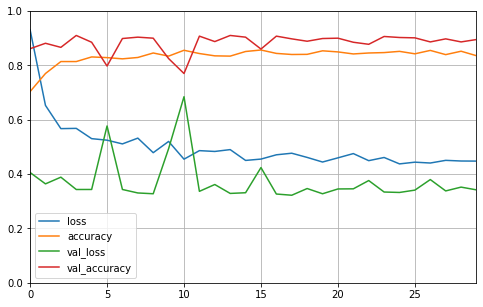

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Conclusion

##### We train three classifiers for classifying images of cats and dogs. We trained three models with very limited data, i.e., 1000 images from each class. In the first model, we train on orginal images only, while in the second one we adopted a technique called data augmentation. Finally, the third model, we used the pre-trained network VGG16 embedding with our model. The results show that the last method obtains about 89% accurate, while the second and first obtain 74% and 69%, respectively. 

##### Some regularization methods such as $\ell_2$ and $\ell_1$ may improve the performance of each classifiers. 